<a href="https://colab.research.google.com/github/Arraj2611/ml_projects/blob/main/NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
print(bool(tf.test.is_gpu_available))

True


In [3]:
# !nvidia-smi


# Working with Multiclass classification using the Fashion-mnist dataset
* dataset link- https://www.tensorflow.org/datasets/catalog/fashion_mnist
* Data Lables:-

| lable | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle Boot  |

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_lables), (test_data, test_lables) = fashion_mnist.load_data()

In [5]:
train_data[0], train_lables[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [6]:
train_data[0].shape, train_lables[0].shape

((28, 28), ())

(<matplotlib.image.AxesImage at 0x2cbd8d31d00>, 2)

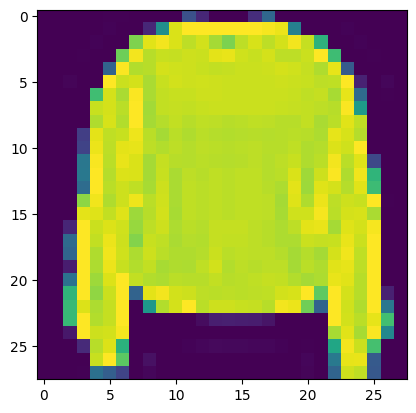

In [7]:
plt.imshow(train_data[7]), train_lables[7]

In [8]:
# Create list to indentify lables
class_lables = ["T-Shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

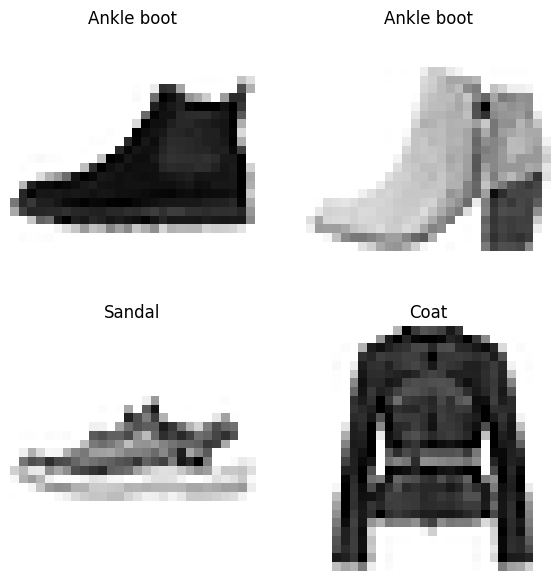

In [9]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  index = random.choice(range(len(train_data)))
  plt.imshow(train_data[index], cmap=plt.cm.binary)
  plt.title(class_lables[train_lables[index]])
  plt.axis(False)

## Creating a model
* input shape:- 28x28 (image size)
* output shape:- 10 (number of classes)
* loss function:- [Categorical Cross Entropy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_crossentropy)
* Output Activation:- [Softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax)

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(train_data, tf.one_hot(train_lables, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_lables, depth=10)))

Epoch 1/10


C:\Users\arraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.1016 - loss: 4.3971 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.0985 - loss: 2.3048 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 884us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3039
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.0985 - loss: 2.30

In [11]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

## Let's try to normalize the data to range 0 - 1 to improve our model's acccuracy

In [12]:
train_data_norm = train_data / 255.0

In [13]:
test_data_norm = test_data / 255.0
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [14]:
test_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [15]:
# Create model_2 with normalized data

tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_2.fit(train_data_norm, train_lables, epochs=10, validation_data=(test_data_norm, test_lables))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2395 - loss: 1.9201 - val_accuracy: 0.5554 - val_loss: 1.1610
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5713 - loss: 1.1079 - val_accuracy: 0.5762 - val_loss: 1.0383
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.5886 - loss: 1.0148 - val_accuracy: 0.5872 - val_loss: 1.0021
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.5993 - loss: 0.9803 - val_accuracy: 0.5921 - val_loss: 0.9868
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.6110 - loss: 0.9608 - val_accuracy: 0.6025 - val_loss: 0.9767
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.6228 - loss: 0.9456 - val_accuracy: 0.6156 - val_loss: 0.9612
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.6391 - loss: 0.9278 - val_accuracy: 0.6399 - val_loss: 0.9389
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.6560 - los

## Let's try to tweak our model by implementing a few steps
1. Increase a hidden layer or increase units in a layer
2. Change Learning rate
3. Train for longer i.e increase epochs to around 40

In [16]:
# Add a layer and increase units in each layer

# Set random seed
tf.random.set_seed(42)

# Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
                metrics=["accuracy"])

# Fit model
model_3.fit(train_data_norm, train_lables, epochs=40, validation_data=(test_data_norm, test_lables))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5948 - loss: 1.1167 - val_accuracy: 0.7879 - val_loss: 0.5752
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8054 - loss: 0.5317 - val_accuracy: 0.8195 - val_loss: 0.5085
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.8259 - loss: 0.4807 - val_accuracy: 0.8203 - val_loss: 0.5005
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.8312 - loss: 0.4629 - val_accuracy: 0.8262 - val_loss: 0.4921
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8353 - loss: 0.4517 - val_accuracy: 0.8298 - val_loss: 0.4874
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8389 - loss: 0.4430 - val_accuracy: 0.8314 - val_loss: 0.4879
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8411 - loss: 0.4382 - val_accuracy: 0.8310 - val_loss: 0.4811
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8453 - loss: 0.430

## Let's evaluate our model

In [17]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


In [18]:
class_lables

['T-Shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
# Make some predictions with our model
y_probs = model_3.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


array([[1.0607571e-14, 1.0782089e-12, 1.1735012e-15, 5.3670635e-25,
        5.9285185e-20, 2.2826481e-03, 5.3552588e-19, 4.5031592e-02,
        2.6743774e-11, 9.5268577e-01],
       [1.6092723e-02, 5.9886253e-04, 8.1995517e-01, 2.0139918e-03,
        2.9116537e-02, 1.6733591e-06, 1.3074757e-01, 1.3763718e-10,
        1.3980626e-03, 7.5485528e-05],
       [2.6445711e-08, 9.9991012e-01, 7.9394177e-08, 4.7875947e-08,
        1.9264128e-07, 6.7288711e-05, 1.5660550e-09, 2.2092798e-05,
        1.7911428e-10, 1.2013042e-09],
       [1.5990043e-08, 9.9999809e-01, 6.1475937e-08, 1.5706999e-07,
        6.2071415e-08, 1.0192603e-06, 1.1373895e-09, 5.8354954e-07,
        7.0180142e-12, 2.7323994e-12],
       [2.6167119e-01, 4.6984409e-04, 5.6265365e-02, 2.1287886e-02,
        3.1491586e-03, 7.1930095e-05, 6.2598699e-01, 2.0533193e-04,
        3.0870372e-02, 2.1973452e-05]], dtype=float32)

In [20]:
y_probs[0], tf.argmax(y_probs[0]), class_lables[tf.argmax(y_probs[0])]

(array([1.0607571e-14, 1.0782089e-12, 1.1735012e-15, 5.3670635e-25,
        5.9285185e-20, 2.2826481e-03, 5.3552588e-19, 4.5031592e-02,
        2.6743774e-11, 9.5268577e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [21]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [22]:
test_lables

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_lables,
                 y_pred=y_preds)

array([[788,   4,   9,  58,   3,   0, 126,   0,  12,   0],
       [  2, 954,   9,  27,   5,   0,   2,   0,   1,   0],
       [ 14,   3, 671,  15, 163,   0, 124,   0,  10,   0],
       [ 35,  17,   3, 863,  38,   0,  36,   0,   8,   0],
       [  0,   3,  84,  44, 780,   0,  69,   0,  20,   0],
       [  0,   4,   1,   0,   0, 903,   1,  41,  18,  32],
       [140,   1,  81,  42, 106,   0, 603,   0,  27,   0],
       [  0,   0,   0,   0,   0,  38,   0, 931,   1,  30],
       [  2,   0,   2,   8,   5,   2,  12,   3, 964,   2],
       [  0,   0,   0,   0,   0,  13,   1,  39,   4, 943]], dtype=int64)

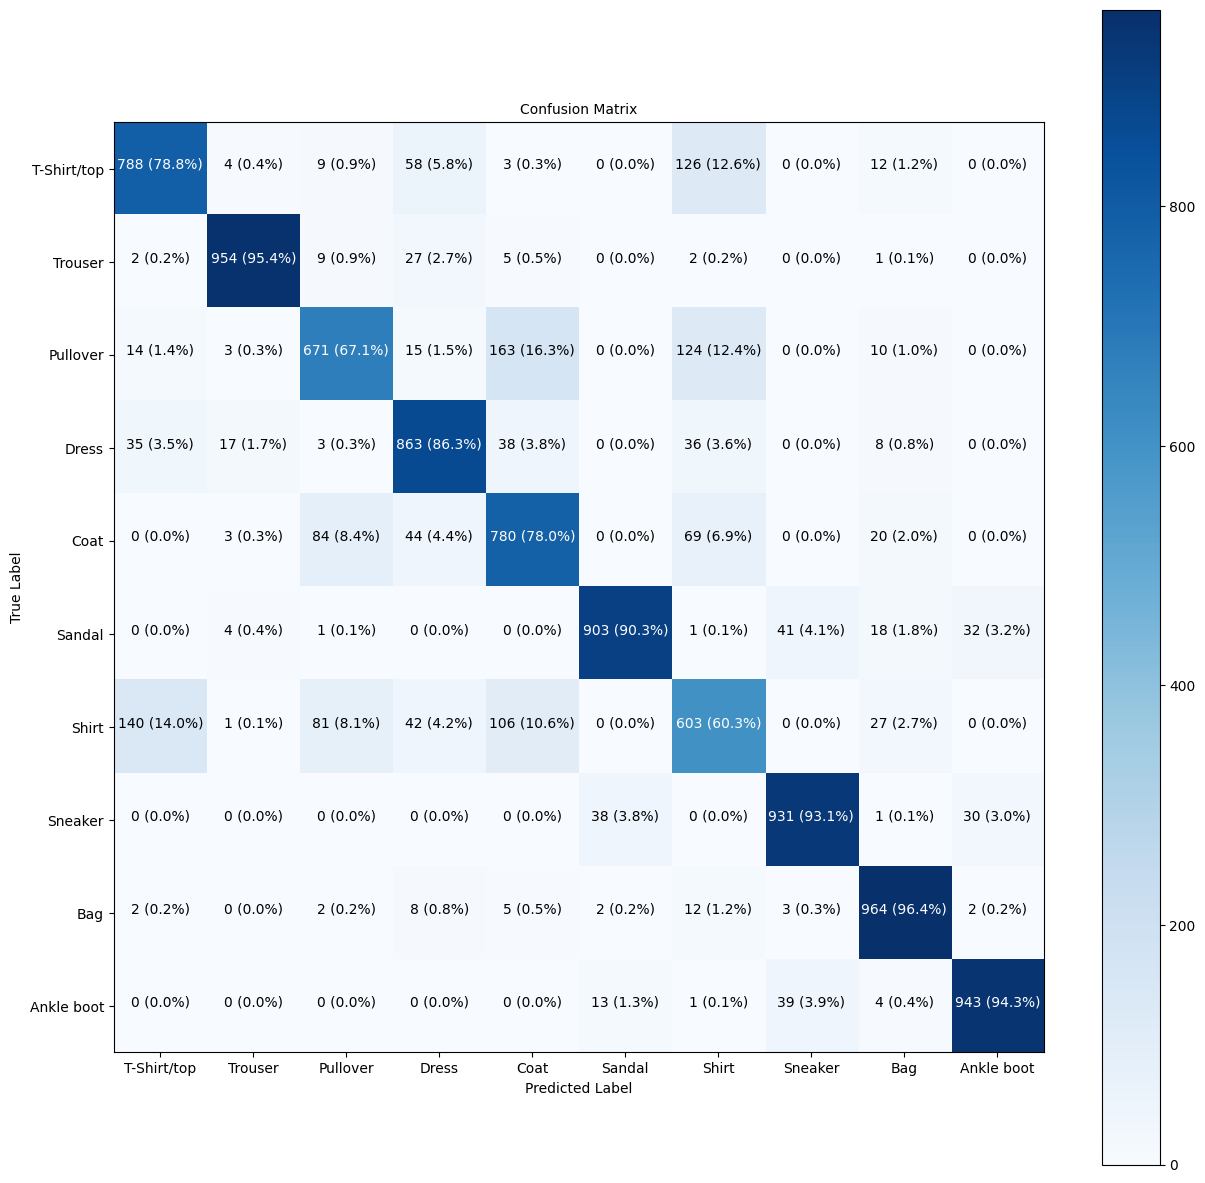

In [24]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_lables,
                      y_pred=y_preds,
                      classes=class_lables,
                      figsize=(15, 15),
                      text_size=10)

In [25]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


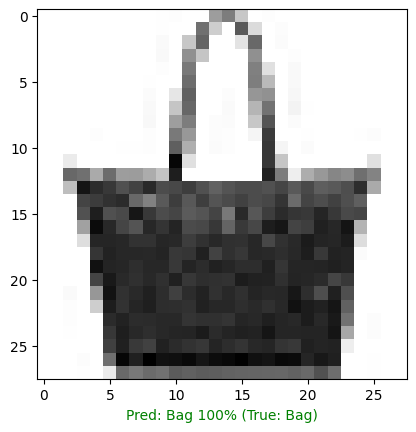

In [26]:
# Check out a random image as well as its prediction
plot_random_image(model=model_3,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_lables,
                  classes=class_lables)

In [27]:
# Get the patterns of a layer in our network
weights, biases = model_3.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 1.2407624 , -1.8220623 , -0.07984561, ...,  0.05021189,
          2.1305187 ,  0.02640638],
        [-1.6703221 , -1.7357275 ,  1.8729357 , ...,  1.6132029 ,
          3.5110874 ,  0.08696425],
        [-4.2006936 , -3.0252256 ,  0.7412823 , ...,  1.0117598 ,
          2.367878  , -0.06170272],
        ...,
        [-0.405656  ,  1.0995681 ,  0.55559415, ...,  0.26183814,
         -0.07490049,  0.01936907],
        [-0.48643863,  1.5602994 ,  0.07429474, ..., -0.30976772,
          1.6793321 , -0.07939146],
        [-4.150242  , -0.03807855,  0.2728383 , ..., -0.4139172 ,
          3.5270271 , -0.0519458 ]], dtype=float32),
 (784, 8))

In [28]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │           6,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │              90 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,544 (76.35 KB)

 Trainable params: 6,514 (25.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,030 (50.90 KB)